# Variational Quantum Eigensolver (VQE)

Reference:
https://learning.quantum.ibm.com/course/variational-algorithm-design

In [1]:
import numpy as np
from qiskit import QuantumCircuit
from qiskit.quantum_info import SparsePauliOp
from qiskit.circuit.library import TwoLocal, EfficientSU2
from qiskit_aer import AerSimulator
from qiskit_aer.primitives import EstimatorV2 as Estimator
from qiskit.transpiler.preset_passmanagers import generate_preset_pass_manager
from scipy.optimize import minimize

class VQE:
    def cost_func_vqe(self, params, auxiliary, hamiltonian, estimator):
        pub = (auxiliary, hamiltonian, params)
        cost = estimator.run([pub]).result()[0].data.evs
        return cost

    def exec(self, params, auxiliary, hamiltonian):
        backend = AerSimulator()

        pm = generate_preset_pass_manager(optimization_level=1, backend=backend)
        isa_auxiliary = pm.run(auxiliary)
        isa_observable = hamiltonian.apply_layout(layout=isa_auxiliary.layout)

        estimator = Estimator()
        result = minimize(self.cost_func_vqe, params, args=(isa_auxiliary, isa_observable, estimator), method="COBYLA")

        print(result)


## Using TwoLocal

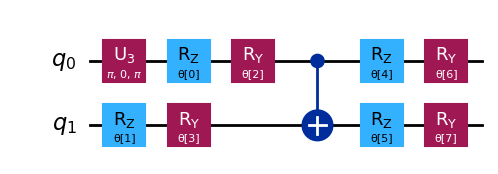

In [2]:
hamiltonian = SparsePauliOp.from_list([("XX", 1), ("YY", -3)])

reference_circuit = QuantumCircuit(2)
reference_circuit.x(0)

variational_form = TwoLocal(
    2,
    rotation_blocks=["rz", "ry"],
    entanglement_blocks="cx",
    entanglement="linear",
    reps=1,
)
auxiliary = reference_circuit.compose(variational_form)

auxiliary.decompose(reps=1).draw('mpl')

In [3]:
x0 = np.ones(8)

vqe = VQE()

vqe.exec(x0, auxiliary, hamiltonian)

 message: Optimization terminated successfully.
 success: True
  status: 1
     fun: -3.999999988924855
       x: [ 9.466e-01  7.982e-01  1.571e+00  3.142e+00  1.494e+00
           -1.647e+00  1.470e+00  1.672e+00]
    nfev: 144
   maxcv: 0.0


## Using EfficientSU2

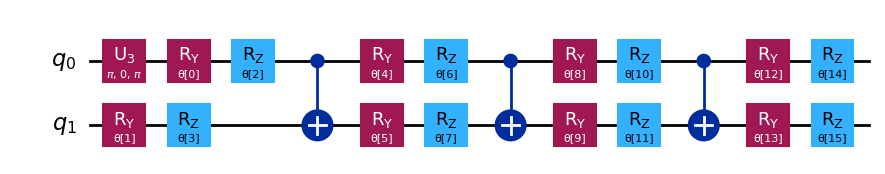

In [4]:
hamiltonian = SparsePauliOp.from_list([("XX", 1), ("YY", -3)])

reference_circuit = QuantumCircuit(2)
reference_circuit.x(0)

variational_form = EfficientSU2(2)
auxiliary = reference_circuit.compose(variational_form)

auxiliary.decompose(reps=1).draw('mpl')

In [5]:
x0 = np.ones(16)

vqe = VQE()

vqe.exec(x0, auxiliary, hamiltonian)

 message: Optimization terminated successfully.
 success: True
  status: 1
     fun: -3.9999999486367175
       x: [ 7.541e-01  1.891e+00 ...  1.664e-01  1.478e+00]
    nfev: 300
   maxcv: 0.0
